In [72]:
# Import
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
# ============================================================
# 🎨 FORMATAGE GLOBAL — 2 DÉCIMALES PARTOUT
# ============================================================

import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# --- Numpy : contrôle global des flottants ---
np.set_printoptions(precision=2, suppress=True)

# --- Pandas : affichage DataFrame arrondi ---
pd.options.display.float_format = "{:,.2f}".format

# --- Optionnel : affichage plus lisible ---
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)
pd.set_option("display.width", 120)

print("✅ Formatage global activé : tous les nombres affichés avec 2 décimales.")

# (optionnel)
float_formatter = "{:.2f}".format
pd.set_option("display.float_format", float_formatter)


✅ Formatage global activé : tous les nombres affichés avec 2 décimales.


In [74]:
df_sirh = pd.read_csv('extrait_sirh.csv')
df_eval = pd.read_csv('extrait_eval.csv')
df_sondage = pd.read_csv('extrait_sondage.csv')

In [75]:
display(df_sirh.head(10))
print(df_sirh.shape)
display(df_eval.head(10))
print(df_eval.shape)
display(df_sondage.head(10))
print(df_sondage.shape)

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2
5,8,32,M,3068,Célibataire,Consulting,Consultant,0,80,8,7,7
6,10,59,F,2670,Marié(e),Consulting,Consultant,4,80,12,1,0
7,11,30,M,2693,Divorcé(e),Consulting,Consultant,1,80,1,1,0
8,12,38,M,9526,Célibataire,Consulting,Tech Lead,0,80,10,9,7
9,13,36,M,5237,Marié(e),Consulting,Manager,6,80,17,7,7


(1470, 12)


,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %
5,4,3,1,4,3,2,E_8,3,Non,13 %
6,3,4,1,1,1,2,E_10,4,Oui,20 %
7,4,3,1,3,2,3,E_11,4,Non,22 %
8,4,2,3,3,2,3,E_12,4,Non,21 %
9,3,3,2,3,2,2,E_13,3,Non,13 %


(1470, 10)


,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2
5,Non,0,2,1,8,2,2,Infra & Cloud,Y,Frequent,3,6
6,Non,3,3,1,10,3,3,Transformation Digitale,Y,Occasionnel,0,0
7,Non,1,2,1,11,24,1,Infra & Cloud,Y,Occasionnel,0,0
8,Non,0,2,1,12,23,3,Infra & Cloud,Y,Frequent,1,8
9,Non,2,3,1,13,27,3,Transformation Digitale,Y,Occasionnel,7,7


(1470, 12)


In [76]:
df_sondage.describe(include='all')

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470,1470,1470,1470.00,1470.00
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,6,1,3,NaN,NaN
top,Non,NaN,NaN,NaN,NaN,NaN,NaN,Infra & Cloud,Y,Occasionnel,NaN,NaN
freq,1233,NaN,NaN,NaN,NaN,NaN,NaN,606,1470,1043,NaN,NaN
mean,NaN,0.79,2.80,1.00,1024.87,9.19,2.91,NaN,NaN,NaN,2.19,4.12
std,NaN,0.85,1.29,0.00,602.02,8.11,1.02,NaN,NaN,NaN,3.22,3.57
min,NaN,0.00,0.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,0.00,0.00
25%,NaN,0.00,2.00,1.00,491.25,2.00,2.00,NaN,NaN,NaN,0.00,2.00
50%,NaN,1.00,3.00,1.00,1020.50,7.00,3.00,NaN,NaN,NaN,1.00,3.00
75%,NaN,1.00,3.00,1.00,1555.75,14.00,4.00,NaN,NaN,NaN,3.00,7.00


In [77]:
# Exemple : nettoyage automatique
def clean_percent(x):
    """Convertit une chaîne de pourcentage '23 %' en float 23.0"""
    if isinstance(x, str) and "%" in x:
        return float(x.replace("%", "").strip())
    return x

df_eval["augementation_salaire_precedente"] = df_eval["augementation_salaire_precedente"].apply(clean_percent)

# Normalisation des colonnes Oui/Non
df_sondage["a_quitte_l_entreprise"] = (
    df_sondage["a_quitte_l_entreprise"].astype(str).str.strip().str.lower()
)


In [78]:
# Comptage des valeurs uniques
for col in ["genre", "poste", "departement", "statut_marital"]:
    print(f"\n{col} :")
    print(df_sirh[col].value_counts())



genre :
genre
M    882
F    588
Name: count, dtype: int64

poste :
poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

departement :
departement
Consulting             961
Commercial             446
Ressources Humaines     63
Name: count, dtype: int64

statut_marital :
statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64


In [79]:
# Nettoyage de la clé dans df_eval
df_eval["id_employee"] = df_eval["eval_number"].str.replace("E_", "").astype(int)

# Jointure multi-fichiers
joins_df = df_sirh.merge(df_eval, on="id_employee", how="left") \
                  .merge(df_sondage, left_on="id_employee", right_on="code_sondage", how="left")

print(joins_df.shape)
joins_df.head()


(1470, 34)


,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4,2,3,2,4,1,1,E_1,3,Oui,11.00,oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7,3,2,2,2,4,3,E_2,4,Non,23.00,non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0,4,2,1,3,2,3,E_4,3,Oui,15.00,oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7,4,3,1,3,3,3,E_5,3,Oui,11.00,non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2,1,3,1,2,4,3,E_7,3,Non,12.00,non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [80]:
joins_df.describe(include='all')

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
count,1470.00,1470.00,1470,1470.00,1470,1470,1470,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470,1470.00,1470,1470.00,1470,1470.00,1470.00,1470.00,1470.00,1470.00,1470.00,1470,1470,1470,1470.00,1470.00
unique,NaN,NaN,2,NaN,3,3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1470,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,6,1,3,NaN,NaN
top,NaN,NaN,M,NaN,Marié(e),Consulting,Cadre Commercial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E_1,NaN,Non,NaN,non,NaN,NaN,NaN,NaN,NaN,NaN,Infra & Cloud,Y,Occasionnel,NaN,NaN
freq,NaN,NaN,882,NaN,673,961,326,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,1054,NaN,1233,NaN,NaN,NaN,NaN,NaN,NaN,606,1470,1043,NaN,NaN
mean,1024.87,36.92,NaN,6502.93,NaN,NaN,NaN,2.69,80.00,11.28,7.01,4.23,2.72,2.73,2.06,2.73,2.71,2.76,NaN,3.15,NaN,15.21,NaN,0.79,2.80,1.00,1024.87,9.19,2.91,NaN,NaN,NaN,2.19,4.12
std,602.02,9.14,NaN,4707.96,NaN,NaN,NaN,2.50,0.00,7.78,6.13,3.62,1.09,0.71,1.11,1.10,1.08,0.71,NaN,0.36,NaN,3.66,NaN,0.85,1.29,0.00,602.02,8.11,1.02,NaN,NaN,NaN,3.22,3.57
min,1.00,18.00,NaN,1009.00,NaN,NaN,NaN,0.00,80.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,NaN,3.00,NaN,11.00,NaN,0.00,0.00,1.00,1.00,1.00,1.00,NaN,NaN,NaN,0.00,0.00
25%,491.25,30.00,NaN,2911.00,NaN,NaN,NaN,1.00,80.00,6.00,3.00,2.00,2.00,2.00,1.00,2.00,2.00,2.00,NaN,3.00,NaN,12.00,NaN,0.00,2.00,1.00,491.25,2.00,2.00,NaN,NaN,NaN,0.00,2.00
50%,1020.50,36.00,NaN,4919.00,NaN,NaN,NaN,2.00,80.00,10.00,5.00,3.00,3.00,3.00,2.00,3.00,3.00,3.00,NaN,3.00,NaN,14.00,NaN,1.00,3.00,1.00,1020.50,7.00,3.00,NaN,NaN,NaN,1.00,3.00
75%,1555.75,43.00,NaN,8379.00,NaN,NaN,NaN,4.00,80.00,15.00,9.00,7.00,4.00,3.00,3.00,4.00,4.00,3.00,NaN,3.00,NaN,18.00,NaN,1.00,3.00,1.00,1555.75,14.00,4.00,NaN,NaN,NaN,3.00,7.00


In [81]:
print("Âge moyen :", joins_df["age"].mean())
print("Revenu médian :", joins_df["revenu_mensuel"].median())
print("Note moyenne actuelle :", joins_df["note_evaluation_actuelle"].mean())

Âge moyen : 36.923809523809524
Revenu médian : 4919.0
Note moyenne actuelle : 3.1537414965986397


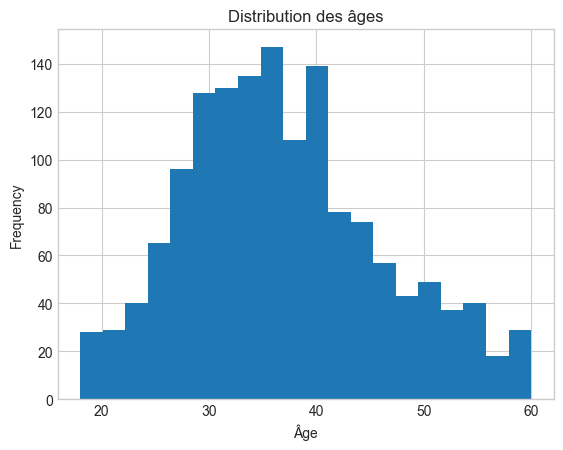

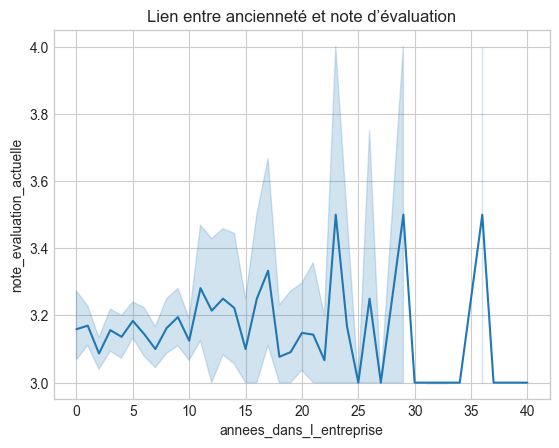

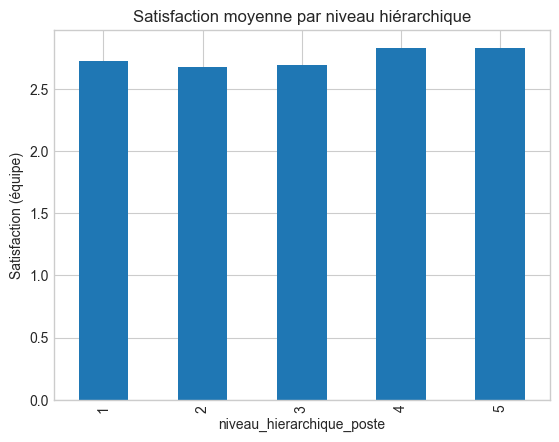

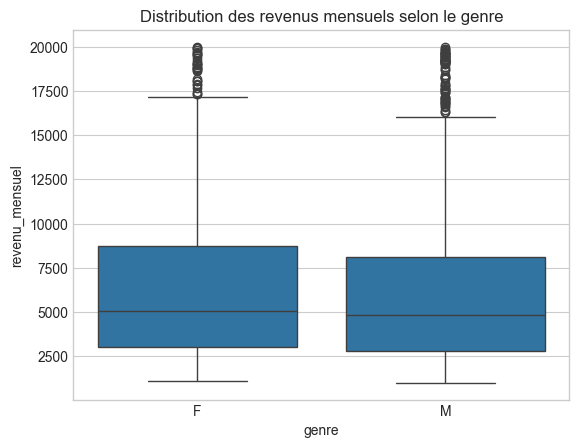

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

# Histogramme des âges
joins_df["age"].plot(kind="hist", bins=20, title="Distribution des âges")
plt.xlabel("Âge")
plt.show()

# Relation entre note et ancienneté
sns.lineplot(data=joins_df, x="annees_dans_l_entreprise", y="note_evaluation_actuelle")
plt.title("Lien entre ancienneté et note d’évaluation")
plt.show()

# Satisfaction moyenne par niveau hiérarchique
joins_df.groupby("niveau_hierarchique_poste")["satisfaction_employee_equipe"].mean().plot(
    kind="bar", title="Satisfaction moyenne par niveau hiérarchique"
)
plt.ylabel("Satisfaction (équipe)")
plt.show()

# Revenus selon le genre
sns.boxplot(data=joins_df, x="genre", y="revenu_mensuel")
plt.title("Distribution des revenus mensuels selon le genre")
plt.show()


Nombre d'employés ayant quitté l'entreprise : 237


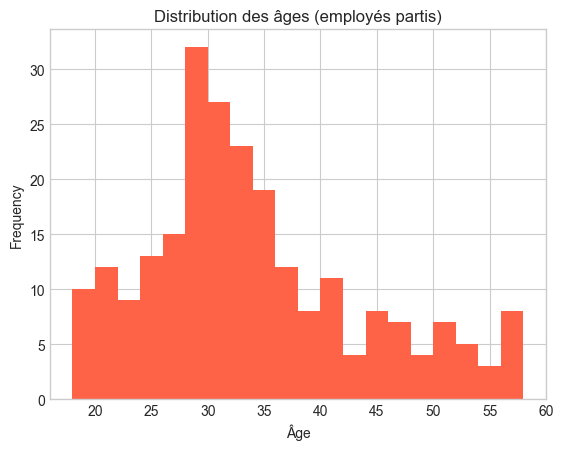

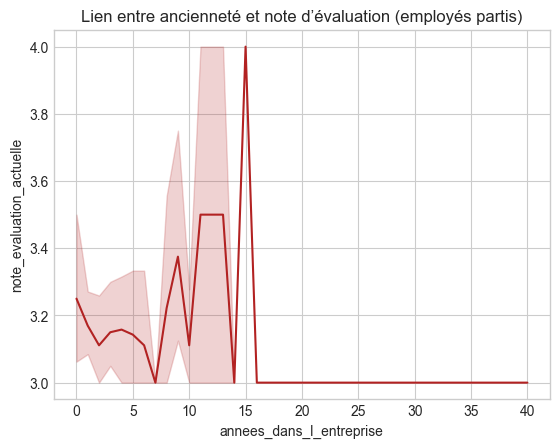

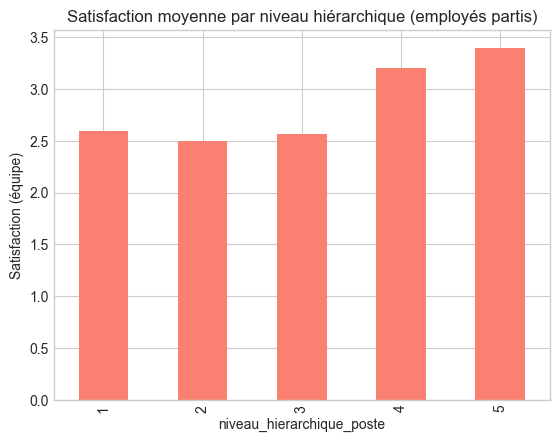

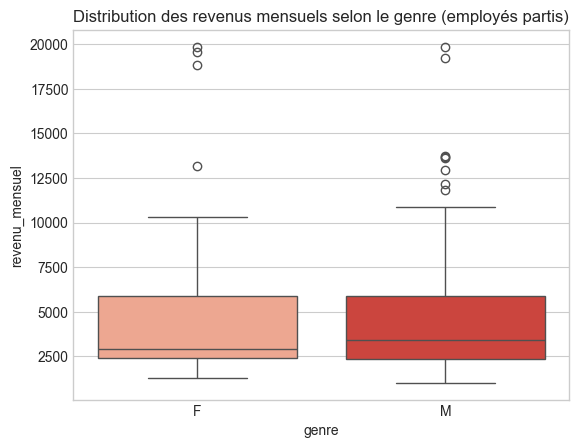

In [83]:
plt.style.use("seaborn-v0_8-whitegrid")

# Filtrage : employés ayant quitté l'entreprise
df_quittes = joins_df[joins_df["a_quitte_l_entreprise"].str.lower() == "oui"]

print(f"Nombre d'employés ayant quitté l'entreprise : {len(df_quittes)}")

# === Histogramme des âges ===
df_quittes["age"].plot(kind="hist", bins=20, color="tomato", title="Distribution des âges (employés partis)")
plt.xlabel("Âge")
plt.show()

# === Relation entre note et ancienneté ===
sns.lineplot(
    data=df_quittes,
    x="annees_dans_l_entreprise",
    y="note_evaluation_actuelle",
    color="firebrick"
)
plt.title("Lien entre ancienneté et note d’évaluation (employés partis)")
plt.show()

# === Satisfaction moyenne par niveau hiérarchique ===
df_quittes.groupby("niveau_hierarchique_poste")["satisfaction_employee_equipe"].mean().plot(
    kind="bar", color="salmon",
    title="Satisfaction moyenne par niveau hiérarchique (employés partis)"
)
plt.ylabel("Satisfaction (équipe)")
plt.show()

# === Revenus selon le genre ===
sns.boxplot(
    data=df_quittes,
    x="genre",
    y="revenu_mensuel",
    palette="Reds"
)
plt.title("Distribution des revenus mensuels selon le genre (employés partis)")
plt.show()

Restés : 1233 | Partis : 237


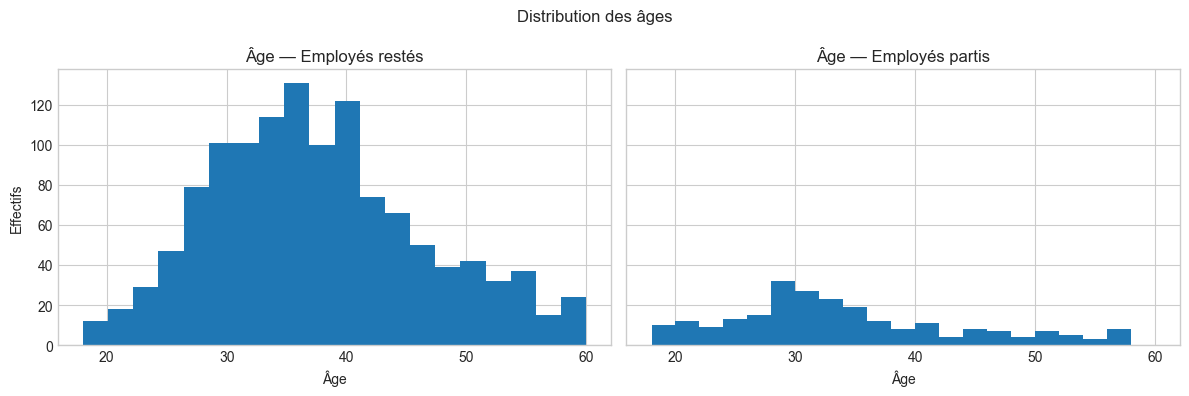

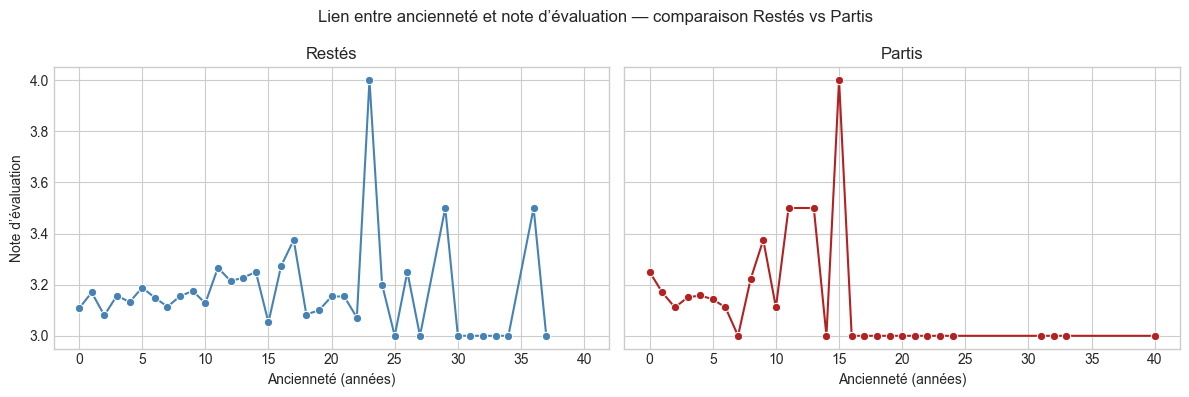

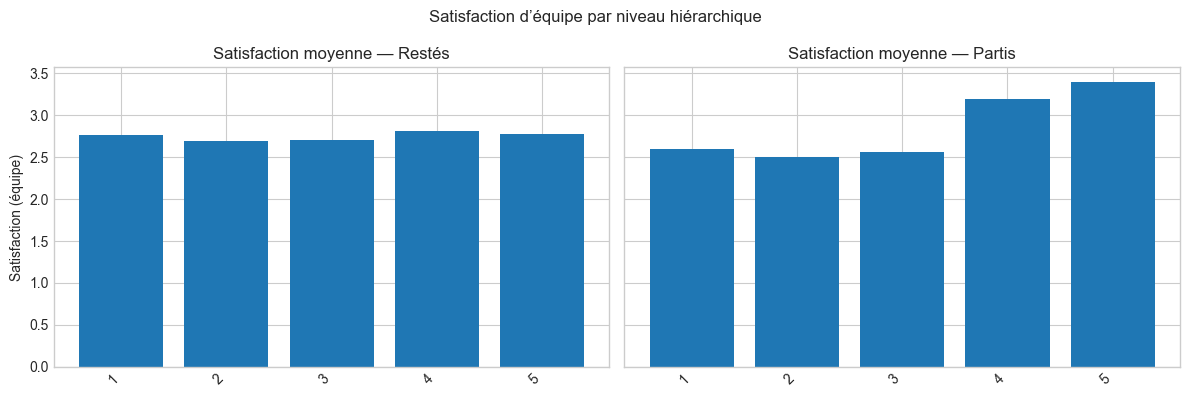

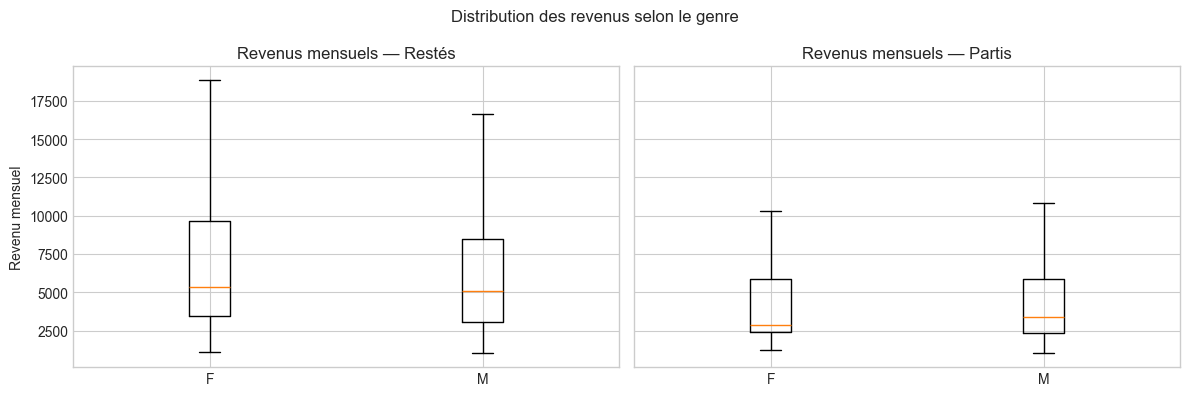

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Normalisation du statut de départ ---
col = "a_quitte_l_entreprise"
joins_df[col] = joins_df[col].astype(str).str.strip().str.lower()

df_quittes = joins_df[joins_df[col] == "oui"].copy()
df_restes  = joins_df[joins_df[col] != "oui"].copy()  # inclut "non", NaN, etc.

print(f"Restés : {len(df_restes)} | Partis : {len(df_quittes)}")

# Petite fonction utilitaire pour harmoniser les axes Y
def match_ylim(ax_left, ax_right):
    ymin = min(ax_left.get_ylim()[0], ax_right.get_ylim()[0])
    ymax = max(ax_left.get_ylim()[1], ax_right.get_ylim()[1])
    ax_left.set_ylim(ymin, ymax)
    ax_right.set_ylim(ymin, ymax)

# =========================
# 1) Histogrammes des âges
# =========================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)
bins = 20

ax1.hist(df_restes["age"].dropna(), bins=bins)
ax1.set_title("Âge — Employés restés")
ax1.set_xlabel("Âge"); ax1.set_ylabel("Effectifs")

ax2.hist(df_quittes["age"].dropna(), bins=bins)
ax2.set_title("Âge — Employés partis")
ax2.set_xlabel("Âge")

plt.suptitle("Distribution des âges")
plt.tight_layout()
plt.show()

# ==============================================
# 2) Ancienneté vs Note d’évaluation (scatter)
# ==============================================
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")

x_col = "annees_dans_l_entreprise"
y_col = "note_evaluation_actuelle"

# Moyenne par ancienneté pour chaque groupe
moy_restes = df_restes.groupby(x_col)[y_col].mean().reset_index()
moy_quittes = df_quittes.groupby(x_col)[y_col].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex=True, sharey=True)

# Employés restés
sns.lineplot(data=moy_restes, x=x_col, y=y_col, marker="o", ax=ax1, color="steelblue")
ax1.set_title("Restés")
ax1.set_xlabel("Ancienneté (années)")
ax1.set_ylabel("Note d’évaluation")

# Employés partis
sns.lineplot(data=moy_quittes, x=x_col, y=y_col, marker="o", ax=ax2, color="firebrick")
ax2.set_title("Partis")
ax2.set_xlabel("Ancienneté (années)")

plt.suptitle("Lien entre ancienneté et note d’évaluation — comparaison Restés vs Partis")
plt.tight_layout()
plt.show()


# ===========================================================
# 3) Satisfaction d'équipe moyenne par niveau hiérarchique
#    (mêmes catégories affichées dans les deux graphiques)
# ===========================================================
cat_col = "niveau_hierarchique_poste"
val_col = "satisfaction_employee_equipe"

# Moyennes par niveau
m_restes  = df_restes.groupby(cat_col, dropna=False)[val_col].mean()
m_quittes = df_quittes.groupby(cat_col, dropna=False)[val_col].mean()

# Harmoniser l’ordre des catégories
cats = sorted(set(m_restes.index).union(set(m_quittes.index)), key=lambda x: str(x))
m_restes  = m_restes.reindex(cats)
m_quittes = m_quittes.reindex(cats)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)

ax1.bar(range(len(cats)), m_restes.values)
ax1.set_xticks(range(len(cats))); ax1.set_xticklabels(cats, rotation=45, ha="right")
ax1.set_title("Satisfaction moyenne — Restés")
ax1.set_ylabel("Satisfaction (équipe)")

ax2.bar(range(len(cats)), m_quittes.values)
ax2.set_xticks(range(len(cats))); ax2.set_xticklabels(cats, rotation=45, ha="right")
ax2.set_title("Satisfaction moyenne — Partis")

match_ylim(ax1, ax2)
plt.suptitle("Satisfaction d’équipe par niveau hiérarchique")
plt.tight_layout()
plt.show()

# ==========================================
# 4) Revenus mensuels — boxplots par genre
#    (mêmes genres affichés des 2 côtés)
# ==========================================
g_col = "genre"
y_rev = "revenu_mensuel"

# Préparer listes par genre
genres = sorted(set(joins_df[g_col].dropna().unique()), key=lambda x: str(x))

data_restes  = [df_restes[df_restes[g_col]==g][y_rev].dropna().values for g in genres]
data_quittes = [df_quittes[df_quittes[g_col]==g][y_rev].dropna().values for g in genres]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharey=True)

bp1 = ax1.boxplot(data_restes, labels=genres, showfliers=False)
ax1.set_title("Revenus mensuels — Restés")
ax1.set_ylabel("Revenu mensuel")

bp2 = ax2.boxplot(data_quittes, labels=genres, showfliers=False)
ax2.set_title("Revenus mensuels — Partis")

match_ylim(ax1, ax2)
plt.suptitle("Distribution des revenus selon le genre")
plt.tight_layout()
plt.show()


metric de sortie : predict proba (checkez param)

In [85]:
display(joins_df.columns)

Index(['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste',
       'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale',
       'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel', 'satisfaction_employee_environnement',
       'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail',
       'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number',
       'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente',
       'a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies',
       'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education',
       'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion',
       'annes_sous_responsable_actuel'],
      dtype='object')

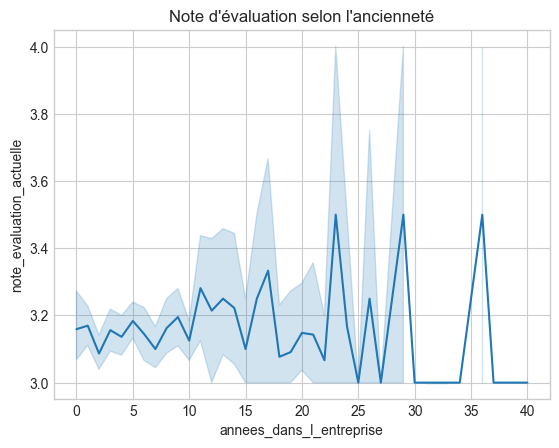

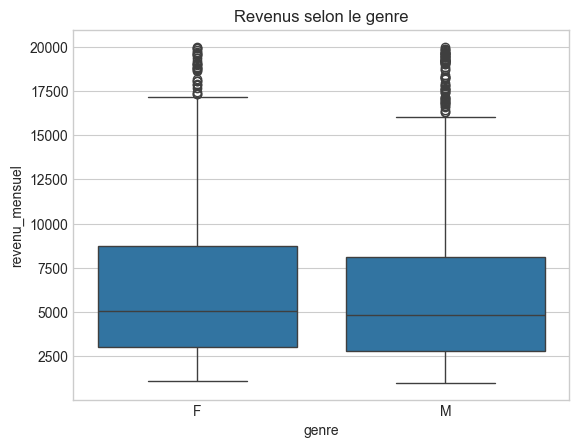

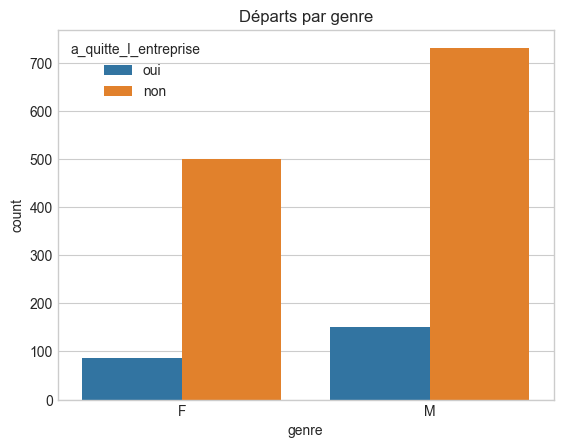

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Quanti ↔ Quanti
sns.lineplot(data=joins_df, x="annees_dans_l_entreprise", y="note_evaluation_actuelle")
plt.title("Note d'évaluation selon l'ancienneté")
plt.show()

# Quanti ↔ Quali
sns.boxplot(data=joins_df, x="genre", y="revenu_mensuel")
plt.title("Revenus selon le genre")
plt.show()

# Quali ↔ Quali
sns.countplot(data=joins_df, x="genre", hue="a_quitte_l_entreprise")
plt.title("Départs par genre")
plt.show()


In [87]:
joins_df.isnull().sum()

id_employee                                  0
age                                          0
genre                                        0
revenu_mensuel                               0
statut_marital                               0
departement                                  0
poste                                        0
nombre_experiences_precedentes               0
nombre_heures_travailless                    0
annee_experience_totale                      0
annees_dans_l_entreprise                     0
annees_dans_le_poste_actuel                  0
satisfaction_employee_environnement          0
note_evaluation_precedente                   0
niveau_hierarchique_poste                    0
satisfaction_employee_nature_travail         0
satisfaction_employee_equipe                 0
satisfaction_employee_equilibre_pro_perso    0
eval_number                                  0
note_evaluation_actuelle                     0
heure_supplementaires                        0
augementation

In [90]:
columns_to_drop = ['eval_number', 'code_sondage', 'nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'id_employee', 'departement', 'poste', 'niveau_education', 'nombre_experiences_precedentes']
joins_df = joins_df.drop(columns=columns_to_drop)

KeyError: "['eval_number', 'code_sondage', 'nombre_heures_travailless', 'nombre_employee_sous_responsabilite', 'id_employee', 'departement', 'poste', 'niveau_education', 'nombre_experiences_precedentes'] not found in axis"

In [91]:
# Separate target variable Y from features X
print("Separating target variable from features...")

## Choose the columns you want to have as your features
features_list = joins_df.columns[1:]

X = joins_df.drop(columns=['a_quitte_l_entreprise'])
y = joins_df['a_quitte_l_entreprise']

print("...Done.")
print()

Separating target variable from features...
...Done.



In [92]:
# Divide dataset Train set & Test set 
print("Splitting dataset into train set and test set...")
## Then we use train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0)

print("...Done.")   

Splitting dataset into train set and test set...
...Done.


In [93]:
# Conversion explicite
y_test_num = y_test.astype(str).str.strip().str.lower().map({"oui": 1, "non": 0, "y": 1, "n": 0})


In [94]:
from sklearn.compose import ColumnTransformer, make_column_selector as selector

# === Prétraitement automatique ===
numeric_selector = selector(dtype_include=np.number)
categorical_selector = selector(dtype_exclude=np.number)

feature_encoder = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_selector),
        ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_selector)
    ]
)

# Transformation
X_train_enc = feature_encoder.fit_transform(X_train)
X_test_enc = feature_encoder.transform(X_test)
print("#### X_train AFTER preprocessing ####")
print(X_train_enc[:5, :])
print("Shape :", X_train_enc.shape)



#### X_train AFTER preprocessing ####
[[ 2.34  2.42  2.3  -0.98 -1.16  1.14  0.39  1.76  1.15  0.26 -1.07 -0.42
  -0.59  0.23 -0.61  1.46 -0.67 -1.15  1.    0.    0.    0.    1.    0.
   1.    0.    0.    1.    0.    0.    0.    1.    0.    0.    1.  ]
 [ 0.9  -0.92 -0.41 -0.33 -0.05  1.14  0.39 -0.95  1.15  1.19  0.33  2.38
   1.33  0.23  0.19  2.32 -0.67 -0.31  0.    1.    0.    0.    1.    1.
   0.    0.    1.    0.    0.    0.    0.    1.    0.    0.    1.  ]
 [ 0.35  0.41 -0.41  0.    0.77  0.23  0.39 -0.05 -1.57 -0.66 -1.07 -0.42
  -0.32  0.23  0.19  2.07  1.51  0.25  0.    1.    0.    0.    1.    1.
   0.    0.    0.    0.    1.    0.    0.    1.    0.    0.    1.  ]
 [-0.09  0.24 -0.15  0.5   0.77 -1.6  -1.01  0.85 -1.57 -0.66  0.33 -0.42
  -0.04 -0.93 -1.41 -0.14 -0.67  1.38  0.    1.    1.    0.    0.    1.
   0.    0.    0.    1.    0.    0.    0.    1.    1.    0.    0.  ]
 [-1.3  -1.13 -1.31 -0.98 -1.16  0.23 -2.41 -0.95  1.15  1.19  0.33 -0.42
  -0.32 -0.93  0.99  1.82 -0

In [95]:
# === Entraînement du modèle ===
print("\nTrain model...")
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_enc, y_train)
print("✅ ...Done.")


Train model...
✅ ...Done.


In [96]:
print("Train score: ", f"{classifier.score(X_train_enc, y_train):.2f}")
print("Test score: ", f"{classifier.score(X_test_enc, y_test):.2f}")

Train score:  0.88
Test score:  0.88


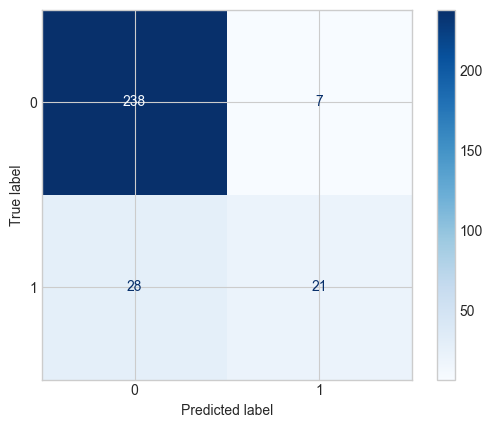

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = classifier.predict(X_test_enc)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")


In [98]:
# Pour un modèle de classification binaire
y_pred_proba = classifier.predict_proba(X_test_enc)[:, 1]  # proba de la classe "1"


In [99]:
from sklearn.metrics import roc_auc_score, log_loss, roc_curve, precision_recall_curve, auc

# AUC ROC
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC ROC : {auc_score:.3f}")

# Log Loss
logloss = log_loss(y_test, y_pred_proba)
print(f"Log Loss : {logloss:.3f}")


AUC ROC : 0.853
Log Loss : 0.319


Valeurs non converties : 0


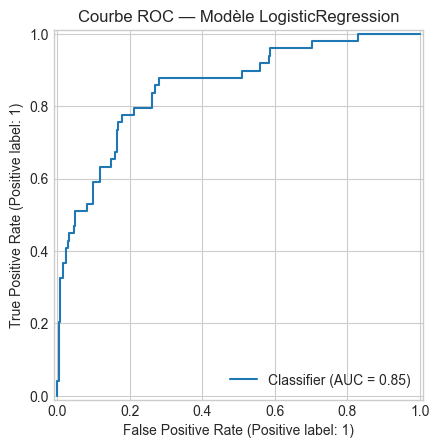

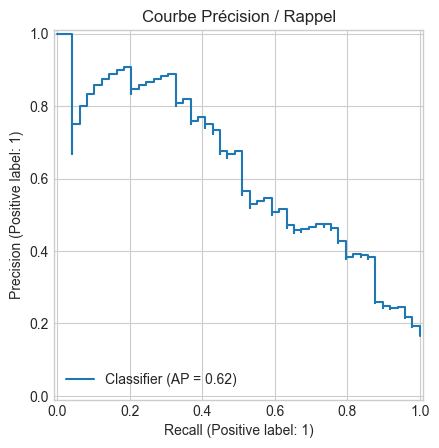

In [100]:
# Normalisation de la cible en numérique
y_test_num = (
    pd.Series(y_test)
    .astype(str)
    .str.strip()
    .str.lower()
    .map({"oui": 1, "non": 0, "y": 1, "n": 0})
)

# Vérifie qu'il n'y a pas de NaN
print("Valeurs non converties :", y_test_num.isna().sum())

# Courbe ROC
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(y_test_num, y_pred_proba)
plt.title("Courbe ROC — Modèle LogisticRegression")
plt.show()

# Courbe Précision / Rappel
PrecisionRecallDisplay.from_predictions(y_test_num, y_pred_proba)
plt.title("Courbe Précision / Rappel")
plt.show()


=== Seuil optimal (max F1) ===
seuil       0.40
f1          0.58
precision   0.68
recall      0.51
accuracy    0.88
Name: 6, dtype: float64


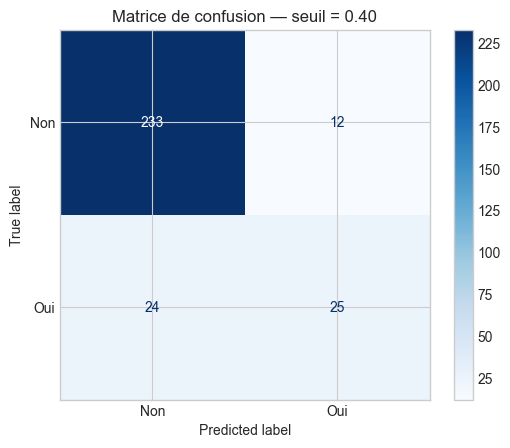


Top seuils par F1 :
   seuil   f1  precision  recall  accuracy
6   0.40 0.58       0.68    0.51      0.88
4   0.30 0.55       0.54    0.57      0.85
3   0.25 0.55       0.47    0.65      0.82
2   0.20 0.55       0.41    0.80      0.78
8   0.50 0.55       0.75    0.43      0.88
5   0.35 0.54       0.58    0.51      0.86
7   0.45 0.54       0.67    0.45      0.87
1   0.15 0.53       0.38    0.86      0.74
9   0.55 0.48       0.89    0.33      0.88
0   0.10 0.46       0.31    0.88      0.65


In [101]:
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1) Convertir y_test en {0,1} une bonne fois
y_test_num = (
    pd.Series(y_test)
    .astype(str).str.strip().str.lower()
    .map({"oui": 1, "non": 0, "y": 1, "n": 0, "true": 1, "false": 0})
)

if y_test_num.isna().any():
    raise ValueError("Certaines valeurs de y_test n'ont pas pu être converties en {0,1}. Vérifie les libellés.")

# 2) Balayage de seuils et métriques
seuils = np.arange(0.10, 0.90, 0.05)
rows = []

for s in seuils:
    preds = (y_pred_proba >= s).astype(int)
    rows.append({
        "seuil": s,
        "f1": f1_score(y_test_num, preds, zero_division=0),
        "precision": precision_score(y_test_num, preds, zero_division=0),
        "recall": recall_score(y_test_num, preds, zero_division=0),
        "accuracy": accuracy_score(y_test_num, preds),
    })

results = pd.DataFrame(rows).sort_values("f1", ascending=False)
best = results.iloc[0]

print("=== Seuil optimal (max F1) ===")
print(best)

# 3) Matrice de confusion au meilleur seuil
best_thresh = best["seuil"]
best_preds = (y_pred_proba >= best_thresh).astype(int)

cm = confusion_matrix(y_test_num, best_preds, labels=[0,1])
disp = ConfusionMatrixDisplay(cm, display_labels=["Non","Oui"])
disp.plot(cmap="Blues", values_format="d")
plt.title(f"Matrice de confusion — seuil = {best_thresh:.2f}")
plt.show()

# 4) (optionnel) afficher le tableau trié
print("\nTop seuils par F1 :")
print(results.head(10))


In [102]:
# --- 0) y en {0,1} (si tu as 'oui'/'non') ---
def to_binary_series(y, positive=("oui","y","true",1)):
    s = pd.Series(y)
    if pd.api.types.is_numeric_dtype(s):
        return s.astype(int)
    s = s.astype(str).str.strip().str.lower()
    return s.map({positive[0]:1, positive[1]:1, positive[2]:1, "1":1,
                  "non":0, "n":0, "false":0, "0":0}).astype(int)

y_train_bin = to_binary_series(y_train)
y_test_bin  = to_binary_series(y_test)

# --- 1) Préprocesseur ---
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), selector(dtype_include=np.number)),
        ("cat", OneHotEncoder(handle_unknown="ignore"), selector(dtype_exclude=np.number)),
    ],
    remainder="drop",
)

# --- 2) Fonction d'évaluation (sans print) ---
def get_positive_scores(model, X):
    if hasattr(model, "predict_proba"):
        return model.predict_proba(X)[:, 1]
    elif hasattr(model, "decision_function"):
        s = model.decision_function(X)
        s = (s - s.min()) / (s.max() - s.min() + 1e-12)
        return s
    else:
        return model.predict(X)

def evaluate_classifier(pipeline, X_train, y_train, X_test, y_test, name):
    pipeline.fit(X_train, y_train)
    y_tr_proba = get_positive_scores(pipeline, X_train)
    y_te_proba = get_positive_scores(pipeline, X_test)

    y_tr_pred = (y_tr_proba >= 0.5).astype(int)
    y_te_pred = (y_te_proba >= 0.5).astype(int)

    acc_tr = accuracy_score(y_train, y_tr_pred); acc_te = accuracy_score(y_test, y_te_pred)
    f1_tr  = f1_score(y_train, y_tr_pred, zero_division=0); f1_te = f1_score(y_test, y_te_pred, zero_division=0)
    prec   = precision_score(y_test, y_te_pred, zero_division=0)
    rec    = recall_score(y_test, y_te_pred, zero_division=0)

    try: auc = roc_auc_score(y_test, y_te_proba)
    except: auc = np.nan
    try: ll  = log_loss(y_test, np.clip(y_te_proba, 1e-6, 1-1e-6))
    except: ll = np.nan

    return {
        "Model": name,
        "ACC_train": acc_tr,
        "ACC_test": acc_te,
        "F1_train": f1_tr,
        "F1_test": f1_te,
        "Precision_test": prec,
        "Recall_test": rec,
        "ROC_AUC_test": auc,
        "LogLoss_test": ll
    }

# --- 3) Liste des modèles ---
models = [
    ("LogisticRegression", Pipeline([("prep", preprocessor),
                                     ("clf", LogisticRegression(max_iter=1000, class_weight="balanced"))])),
    ("RidgeClassifier",    Pipeline([("prep", preprocessor),
                                     ("clf", RidgeClassifier(class_weight="balanced"))])),
    ("SVC_rbf",            Pipeline([("prep", preprocessor),
                                     ("clf", SVC(kernel="rbf", probability=True, class_weight="balanced", random_state=42))])),
    ("LinearSVC",          Pipeline([("prep", preprocessor),
                                     ("clf", LinearSVC(class_weight="balanced", random_state=42))])),
    ("RandomForest",       Pipeline([("prep", preprocessor),
                                     ("clf", RandomForestClassifier(n_estimators=300, random_state=42, class_weight="balanced"))])),
    ("GradBoost",          Pipeline([("prep", preprocessor),
                                     ("clf", GradientBoostingClassifier(n_estimators=300, learning_rate=0.05, random_state=42))])),
    ("XGBoost",            Pipeline([("prep", preprocessor),
                                     ("clf", XGBClassifier(n_estimators=300, learning_rate=0.05, random_state=42, eval_metric="logloss"))])),
    ("LightGBM",           Pipeline([("prep", preprocessor),
                                     ("clf", LGBMClassifier(n_estimators=300, learning_rate=0.05, random_state=42))])),
    ("CatBoost",           Pipeline([("prep", preprocessor),
                                     ("clf", CatBoostClassifier(iterations=300, learning_rate=0.05, depth=6, random_state=42, verbose=0))])),
]

# --- 4) Évaluation comparée en tableau ---
results = []
for name, pipe in models:
    results.append(evaluate_classifier(pipe, X_train, y_train_bin, X_test, y_test_bin, name))

results_df = pd.DataFrame(results)

# Tri + affichage avec 2 décimales
results_df = results_df.sort_values(by="F1_test", ascending=False)
results_df_rounded = results_df.copy()
for col in results_df_rounded.columns:
    if col != "Model":
        results_df_rounded[col] = results_df_rounded[col].round(2)

results_df_rounded

[LightGBM] [Info] Number of positive: 188, number of negative: 988
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000246 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 547
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.159864 -> initscore=-1.659241
[LightGBM] [Info] Start training from score -1.659241


,Model,ACC_train,ACC_test,F1_train,F1_test,Precision_test,Recall_test,ROC_AUC_test,LogLoss_test
0,LogisticRegression,0.75,0.74,0.50,0.51,0.37,0.82,0.85,0.50
5,GradBoost,0.96,0.87,0.86,0.48,0.77,0.35,0.81,0.35
1,RidgeClassifier,0.59,0.62,0.41,0.45,0.30,0.94,0.85,0.69
3,LinearSVC,0.56,0.62,0.40,0.45,0.30,0.92,0.85,0.69
2,SVC_rbf,0.95,0.86,0.82,0.44,0.67,0.33,0.84,0.34
6,XGBoost,1.00,0.85,1.00,0.41,0.60,0.31,0.81,0.39
7,LightGBM,1.00,0.85,1.00,0.39,0.64,0.29,0.81,0.51
8,CatBoost,0.99,0.85,0.97,0.35,0.63,0.24,0.81,0.36
4,RandomForest,1.00,0.86,1.00,0.32,0.77,0.20,0.80,0.36
